# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
display(heroes_df.head())
powers_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.drop('Unnamed: 0', axis = 1, inplace = True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [5]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Dagger,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

For numeric missing values, consider replacing by mean. Whilst this would modify the variance/ standard deviation, still a suitable way forward.

For categorical missing values, look at the unique values to see the split and if we can make any assumptions.



In [6]:
# count number of NaN values in heroes DataFrame
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [7]:
# Look at publisher in greater detail
heroes_df['Publisher'].value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
Icon Comics            4
ABC Studios            4
Shueisha               4
IDW Publishing         4
Wildstorm              3
Sony Pictures          2
Microsoft              1
Rebellion              1
Universal Studios      1
Hanna-Barbera          1
J. K. Rowling          1
South Park             1
Titan Books            1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64

In [8]:
# Would be difficult to 'guess' and prefer not to allocate a wrong publisher. Leave for now

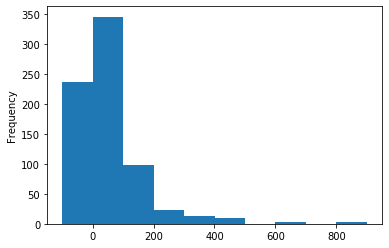

In [9]:
# Let's look at the weight column and do a quick hist plot
heroes_df['Weight'].plot(kind = 'hist')

In [10]:
# Let's replace the missing values with the mean
heroes_df['Weight'].fillna(heroes_df['Weight'].mean(), inplace = True)

In [11]:
# Let's check our missing values again
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [12]:
# We have successfully dealt with the missing values in the weight column

In [13]:
# Investigate NaN values in the other DataFrame
powers_df.isna().any().any() 

False

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [14]:
#Rename'Hero_name' column in Powers DF 
powers_df.rename(columns = {'hero_names' : 'Name'}, inplace = True)

In [15]:
#Rename 'name' column in Heroes DF 
heroes_df.columns = heroes_df.columns.map(lambda x: x.title())

In [16]:
display(heroes_df.head())
powers_df.head()

,Name,Gender,Eye Color,Race,Hair Color,Height,Publisher,Skin Color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,Name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
#set index to be name in both
heroes_df.set_index('Name', inplace = True)
powers_df.set_index('Name', inplace = True)

In [18]:
# Join the DataFrame now that they both have the 'Name' index. 
# We will do an inner join meaning keeping heroes which are in both tables
combined = heroes_df.join(powers_df, how = 'inner')
combined

,Gender,Eye Color,Race,Hair Color,Height,Publisher,Skin Color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,False,...,False,False,False,False,False,False,False,False,False,False
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,True,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [19]:
male_heroes = combined[combined['Gender'] == 'Male']
female_heroes = combined[combined ['Gender'] == 'Female']

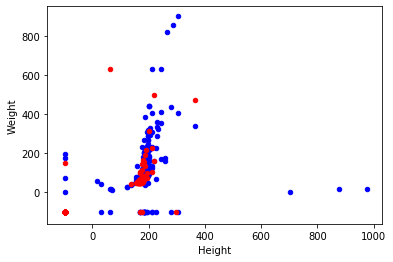

In [20]:
ax = male_heroes.plot(kind = 'scatter', x = 'Height', y = 'Weight', c = 'blue')
female_heroes.plot(kind = 'scatter', x = 'Height', y = 'Weight', c = 'red', ax=ax)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [21]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']

In [22]:
def show_distplot(dataframe, gender, column_name):
    return sns.distplot(dataframe[column_name], kde = False)

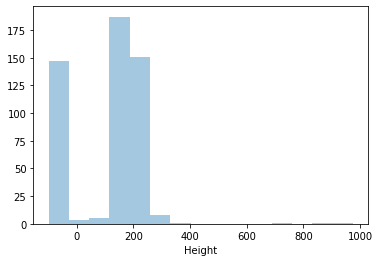

In [23]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')

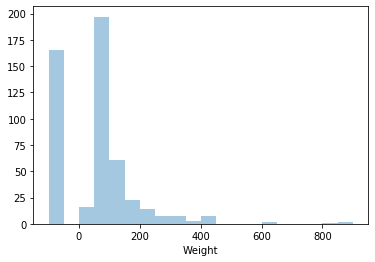

In [24]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')

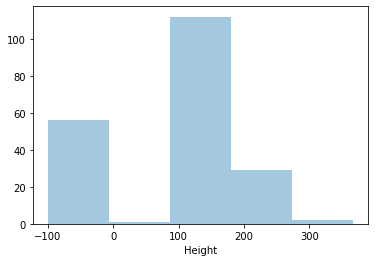

In [25]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')

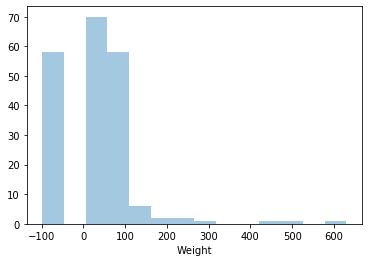

In [26]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



In [27]:
male_heroes_df.describe()

,Height,Weight
count,505.000000,505.000000
mean,107.275248,52.035357
std,144.435370,139.075289
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,180.000000,79.000000
75%,188.000000,101.000000
max,975.000000,900.000000


In [28]:
female_heroes_df.describe()

,Height,Weight
count,200.000000,200.000000
mean,98.052500,27.265000
std,124.819341,103.648007
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,168.000000,54.000000
75%,175.000000,61.000000
max,366.000000,630.000000


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [29]:
# To make counting easier we will map True to 1 and False to 0
for col in combined.columns:
    combined[col]=combined[col].map(lambda x: 1 if x == True else 0 if x == False else x)

In [30]:
combined.head()

,Gender,Eye Color,Race,Hair Color,Height,Publisher,Skin Color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,0,...,0,0,0,0,0,0,0,0,0,0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,1,...,0,0,0,0,0,0,0,0,0,0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,0,...,0,0,0,0,0,0,0,0,0,0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,0,...,0,0,0,0,0,0,0,0,0,0
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
combined['Agility'].values

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,

In [32]:
# These are object type so won't be able to easily sum. Need to change type to int. 

In [33]:
# Define a function to compute top 5
# Get rid of categorical columns to be able to change type to int and sum
# Change type to int
# Create a dictionary of pairs, index being the ability and value the number
# Sort the dictionary.items by value, reverse to obtain highest and return first 5 elements of list
def topfive(dataframe):
    df = dataframe.drop(['Gender', 'Eye Color', 'Race', 'Hair Color', 'Height', 'Publisher', 'Skin Color', 'Alignment', 'Weight'], axis = 1)
    df = df.astype(int)
    topfivedict = dict(df.sum())
    return sorted(topfivedict.items(), key = lambda x : x[1], reverse = True)[:5]

In [34]:
topfivepowers = topfive(combined)
topfivepowers

[('Super Strength', 362),
 ('Stamina', 294),
 ('Durability', 262),
 ('Super Speed', 251),
 ('Agility', 244)]

In [35]:
marveldf = combined[combined['Publisher'] == 'Marvel Comics']
topfivemarvel = topfive(marveldf)
topfivemarvel

[('Super Strength', 204),
 ('Durability', 154),
 ('Stamina', 150),
 ('Super Speed', 137),
 ('Agility', 126)]

In [36]:
dcdf = combined[combined['Publisher']  == 'DC Comics']
topfivedc = topfive(dcdf)
topfivedc

[('Super Strength', 109),
 ('Stamina', 90),
 ('Flight', 86),
 ('Super Speed', 79),
 ('Agility', 71)]

In [37]:
def plotfive (list, publisher=None):
    x_values = [i[0] for i in list ]
    y_values = [i[1] for i in list ]
    if publisher:
        plt.title(f"Top 5 Powers in {publisher} Universe")
    else:
        plt.title("Top 5 Powers")
    plt.bar(x_values, y_values)

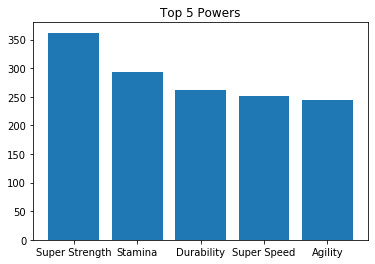

In [38]:
plotfive(topfivepowers)

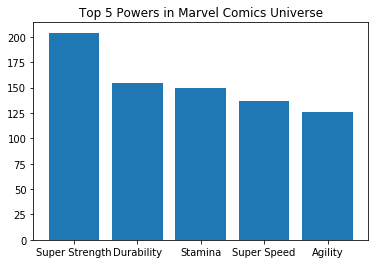

In [39]:
plotfive(topfivemarvel, 'Marvel Comics')

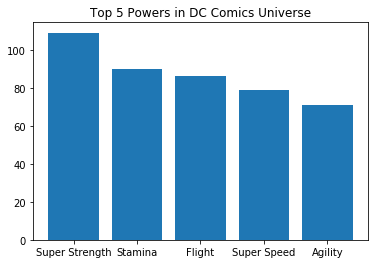

In [40]:
plotfive(topfivedc, 'DC Comics')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:

Marvel heroes have Durability as a common power whereas as DC heroes have Flight
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data